In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

* Statistical inference concerns with quality of parameter estimates. Ex How sure we that estimated mean is near the true population mean?
* Sample mean is called point estimate to population mean.

* 41% believes young adult hit by recession badly than older.
* Sample was 2048 adults of age 18 and  older. Margin of sampling error is + or - 2.9% for results based on total sample and 4.4% points for adults ages 18-4 at the 95% confidence level
    - 41% +- 2.9% meaning,  we are 95% confident that 38.1% to 43.9% of the public believe young adult hits by recession than older.
* Using this sample we got 41% of people agreeing. But having other sample this number can change. Meaning here we are using sample statistics to estimate population parameter.
* Quantifying how sample statistics vary, provide us way to estimate margin of error.

* From population we take several samples, and calculate sample statistics for each sample. Each sample has their own distribution called **sample distribution**. Each observation in sample distribution is randomly sampled observation from population.
* All sample statistics makes new distribution called **sampling distribution**. Each observation is sample statistics. Ex. sample mean
* Sampling distribution is distribution of point estimates based on sample of fixed size from certain population.
![Sampling distribution](images/sampling_distribution.jpg)

* Ex. Average hight of American women, N = population  size, parameter of interest is $\mu$ average of all US women.
![example_sampling_distribution](images/example_sampling_distribution.jpg)

* If variability between sample mean is small, then  that estimates is good.
* Sample size increases standard error decreases, fewer women we sample from each state, more variable the sample mean.

### Central Limit Theorem (CLT)
* Distribution of sample statistics is nearly normal, centered at population mean and with SD equal to population SD 
divided by $\sqrt{n}$ (n = sample size)

$$Sampling Distribution ~ N(mean = \mu, SE = \frac{\sigma}{\sqrt{n}})$$

* Tells about shape, center and spread. when $\sigma$ is unknown use S = sample SD (SD of one sample which we have)
* As sample size increases, sample will yield more consistent sample means so variability among sample means is lower so lower SE.
* Standard deviation of the sample mean tells how far the typical estimate is away from the actual population mean. Also denoted by error of point estimate. So we call this SD the standard Error(SE)
* The standard deviation associated with estimate is called standard error.It describes uncertainty associated with estimate.

#### Condition of CLT
* Independent: Sampled observation must be independent. Random sample/assignment. If sampling without replacement n < 10 % of population.
* Sample size/skew: Either the population is normal or if the population distribution is skew, sample size is large (n > 30).

    - Why 10 % condition? Sampling without replacement, n < 10% of the population. I am living in very small town of 1000 population, my family lives with me. If my sample size is 500 there is high chance me, my family in sample so sample will NOT be independent. So dont grab more than 10%.
    - Why sample size and skew condition? Having skewed population. small sample, shape of sample distribution will mimic the shape of population distribution and sample mean is also variable. Increasing sample size make sample distribution more unimodal and symmetric.
    
* Ex I have slightly skewed population distribution of annual income in developed nation, with mean of 30000$. SD $20000. Take 10000 Random sample of size 625.
    - as n = 625 is large, CLT will hold and sampling distribution to be nearly normal. mean will be quite same as population mean which is 30000, SE = $\frac{20000}{\sqrt{625}} = 800 $

* Just to make sure getting more data will not affect population standard deviation $\sigma$ in any way.

* Scientist found potential harmful compound in human blood. Distribution of it in adult men is 13 mean and SD of 4. We want to take sample for study. How many men has to be sampled that the probability of mean value of the level of compound in her sample is between 12 and 14 is at least 98%.
    - We have a formula SE = pop Std / root(n)
    - We have pop std, we need to find SE, 98 % probability requires us to be 2.33 SD from mean for normal distribution. 2.33 SD is span by (14-13) = 1 => 1 SD = 1/2.33 which is SE
    - 1/2.33 = 4 / root(n) => root(n) = 2.33 * 4 => n = 86.86
    - Sample should have 86.86 men.
* There are 250 dogs at a dog show who weight an average of 12 pounds with std of 8 pounds. If 4 dogs are chosen at random, what is the probability they have an average weight of greater than 8 pounds and less than 25 pounds.
    - Here we want sampling error, SE = 8/root(4) = 4.
    - Mean of sampling distribution will be 12. 
    - Average weight more than 8, so 1 STD left of mean and less than 25 so (25-12) / 4 = 3.25 SD more than mean.
    - 99.99 - 15.866 = 84.07%

In [65]:
from scipy.stats import norm
norm.cdf(25, loc=12, scale=4) - norm.cdf(8, loc=12, scale = 4)

0.8407677210261522

In [69]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(mu=35, size = 150000)
population_ages2 = stats.poisson.rvs(mu = 10, size = 100000)
population_ages = np.concatenate([population_ages1, population_ages2])
population_ages.mean()

25.002372

* Let's take random sample of size 500.

In [79]:
np.random.seed(6)
point_estimate = []
samples = np.random.choice(population_ages, size = (200,500))
sample_mean = np.mean(samples, axis=1)

C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


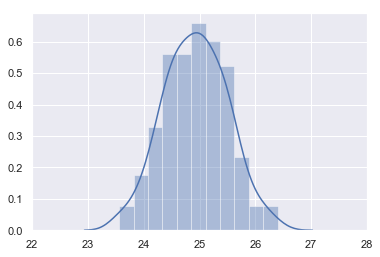

In [83]:
sns.distplot(sample_mean)
plt.xlim(22,28);

In [84]:
population_ages.mean()

25.002372

In [93]:
mean = sample_mean.mean()

In [94]:
mean

24.926869999999997

* Calculate 95% CI.

In [86]:
pop_std = np.std(population_ages)

In [88]:
z_critical = stats.norm.ppf(q = 0.975)
z_critical

1.959963984540054

In [89]:
SE = pop_std / np.sqrt(500)

In [90]:
ME = z_critical * SE

In [95]:
CI = (mean - ME , mean + ME)

In [96]:
CI

(23.767305485857886, 26.08643451414211)

* 95 % of time above range will capture true mean, Let's demonstrate it

In [97]:
intervals = []
sample_means = []
z_critical = stats.norm.ppf(q = 0.975)
pop_std = population_ages.std()

for i in range(25):
    sample = np.random.choice(a=population_ages, size = 500)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    ME = z_critical * (pop_std/np.sqrt(500))
    intervals.append((sample_mean - ME, sample_mean + ME))

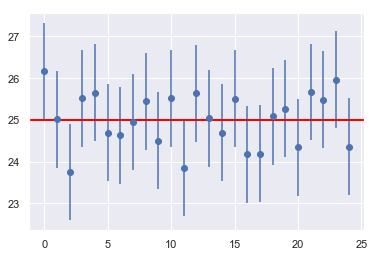

In [105]:
plt.errorbar(x = np.arange(0, 25, 1), y=sample_means, yerr = [(top - bot) / 2 for bot, top in intervals], fmt = 'o')
plt.axhline(population_ages.mean(), xmin=0, xmax=25, linewidth=2.0, color='red')

* Klout score:
    - Single number that designate person's influence on Internet especially on social media.
    - Scale from 1 to 99.
    - Number of retweet on person's tweet, number of likes on posts etc.. will score up Klout score

In [9]:
klout = pd.read_excel('klout_score.xlsx', header=None)

In [13]:
klout.describe()

,0
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


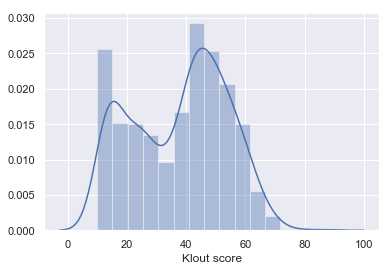

In [50]:
sns.distplot(klout)
plt.xlabel("Klout score");

* Distribution is bimodal, right side group is content creator and left side is consumers

* Let's take 1000 samples of size 35, and compute mean of those sample and plot sampling distribution.

In [51]:
samples = np.random.choice(klout[0], size=(1000, 35))

In [52]:
sample_means = np.mean(samples, axis=1)

In [53]:
sample_means.mean()

37.72758720541767

In [54]:
sample_means.std()

2.770817888401774

* which is almost equal to,

In [55]:
np.std(klout[0]) / np.sqrt(35)

2.710690019380727

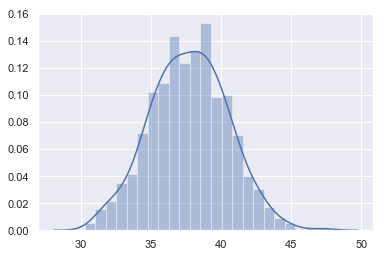

In [56]:
sns.distplot(sample_means);

* Increase the sample size

In [57]:
samples_250 = np.random.choice(klout[0], size = (1000, 250))

In [58]:
sample_means = np.mean(samples_250, axis = 1)

In [59]:
sample_means.std()

0.999259610302503

In [60]:
sample_means.mean()

37.755821591418844

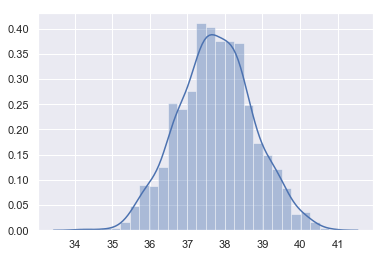

In [61]:
sns.distplot(sample_means);

* We can descrive our sample mean by calculating how many SE it is away from center of sampling distribution (Z-score of sample mean)

## Confidence Interval
* Upper and lower bound on the range of parameter values you might expect to get if we repeat our measurement.
* A plausible range of values for the population parameter is called confidence interval.
* If we report only point estimate, we probably wont hit exact population parameter. If we report a range of plausible values we have a good shot at capturing the parameter. 
* This is like catching fish with arrow vs net.
* Based on one sample mean we want to determine range of population parameter.
* So interval should be constructed around the sample mean. According to CLT, sample mean are distributed normally and center of the distribution is unknown population mean.
* According to 68-95-99.7 rule, roughly 95% of sample mean will be within 2 SD of population mean.
* Meaning for 95% unknown population mean will be within 2 SD of sample mean.
    - 95% confidence interval = $\bar{x} \pm 2 * SE$  
    - 2* SE is called Margin of error (ME)

* Ex. Study on 124 couples found that 64.5% turned their head right during kiss, SE associated with this estimate is 4%
    - Margin of Error for 95% confidence of the percentage of kisser who turn head right is roughly 8 % (2 * SE = 2 * 4)
    - 95% CI for % of kissers who turn head right is 64.5% $\pm$ (2 * 4 %)

* Confidence Interval for population mean can computed as the sample mean $\pm$ a margin of error(Critical value corresponding to middle XX% of the normal distribution times the standard error of the sampling distribution)

$$\bar{x} \pm z*\frac{s}{\sqrt{n}}$$

* z is called critical value

* Randomly selected 100 students for GPA, sample mean is  3.0 and population STD is 0.4. What is 95% CI.
    - 0.4/sqrt(100) = 0.04 = SE
    - CI is 3.0 - (1.96 * 0.04) to 3.0 + (1.96 * 0.04)
    - We are 95% confident that above interval will have true student population mean. 

### Condition for CI
* Independent: Sampled observations must be independent.
    - Random assignment/sample
    - Sampling without replacement n < 10% of population
* Sample size/skew
    - n >= 30, larger if population distribution is very skewed. 

* According to 65-95-99.7% rule, z for 95% is approximately 2, but to find exact Z, 
![Critical Value](images/citical_value.jpg)


### Accuracy vs Precision
* Accuracy, whether or not CI contains the true population parameter. Precision refers to width of CI
* Suppose we took many samples and built CI from each sample using 
    - point estimate $\pm$ 1.96 * SE
    - Then about 95% of those intervals would contain the true population mean $\mu$
Confidence_interval
![Confidence_interval](images/Confidence_interval.jpg)

* Commonly used Confidence levels in practice are 90%, 95%, 98%, 99%.
* What drawbacks are associated with wider interval?
     - Increased confidence level means increased width of CI, means increased accuracy but precision goes down.
* How to get both ? Higher precision and higher accuracy?
    - Increase sample size, it will shrink SE, so we still at higher confidence level without increasing width if CI.

### Required Sample size for ME
* Given a target ME, confidence level, info on variability of the sample, we can determine the required sample size to achieve desired ME
    - ME = z * $\frac{s}{\sqrt{n}}$
    - n = $(\frac{z*s}{ME})^2$
* Ex. SD for IQ score of 3 years old is 18 points. How many children should researcher needed to obtain 90% CI with ME <= 4.
    - Critical value z associated with 90% CI is 1.65
    - n = $(\frac{1.65*18}{4})^2$ = 55.13 is minimum required sample size.
    - needed at least 56 children in sample.
* n and ME is exponential and inversely proportional meaning to cut down ME by 1/3  we need 9n sample size.

* We are XX % confident that the population parameter is in between.......
* CI only try to capture population parameter. It say NOTHING about capturing individual observation, proportion of observation or about capturing the point estimates.
* It only attempts to capture population parameter.
* Example 
![CI_example](images/CI_example.jpg)

- SE = S / $\sqrt{n}$ = 1.74 / $\sqrt{50}$ = 0.246
- Confidence interval for 95%, 3.2 $\pm$ 1.96(0.246)

#### Example: Mooc engagement of students
* Engagement ratio is ratio of number of minutes watched to total minutes available. 

In [120]:
mooc = pd.read_excel('Engagement_ratio.xlsx', header=None)

In [121]:
mooc.head()

,0
0,0.000149
1,0.032047
2,0.071611
3,0.120725
4,0.004766


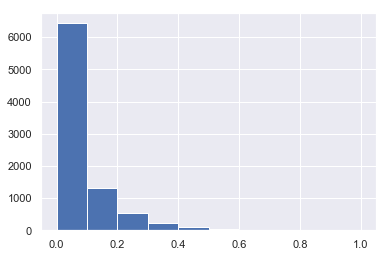

In [128]:
plt.hist(mooc[0]);

In [136]:
mooc_mean = mooc[0].mean()

In [137]:
mooc_mean

0.07726584465256944

In [138]:
mooc_sd = mooc[0].std()

In [139]:
mooc_sd

0.10721572539079689

* Tutor did one experiment of singing a formula to make study more fun oriented. We try this on sample of 20 students and sample mean we got for engagement ratio is 0.13.
* SE = mooc_sd / root(20)

In [140]:
SE = mooc_sd / np.sqrt(20)

In [141]:
SE

0.023974165023077205

* 95% confidence interval is 

In [144]:
CI = (0.13 - SE*1.96, 0.13 + SE*1.96)

In [145]:
CI

(0.08301063655476867, 0.17698936344523133)

-------------

### 1 sample z-test
* The one-sample z-test can be used when the population is normally distributed, and the population variance is known.

## Hypothesis Testing
* Analyze a sample in an attempt to distinguish between population characteristics that are likely to occur and nor likely to occur.
* Let $\mu$ be the population mean and $\mu_0$ be the hypothesized value of population mean
    - One tailed(lower tail) H0: $\mu$ >= $\mu_0$ and Ha = $\mu$ < $\mu_0$
    - One tailed (upper tail) H0: $\mu$ <= $\mu_0$ and Ha = $\mu$ > $\mu_0$
    - Two tailed : H0: $\mu$ = $\mu_0$ Ha $\mu$ != $\mu_0$
* Null $H_0$ Hypothesis: Often either skeptical perspective or a claim to be tested (=)
* Alternative $H_A$ Hypothesis: Alternative claim under consideration and is often represented by range of possible parameter values. (<, >, !=)
* We will not reject $H_0$ unless the evidence in favor of the $H_A$ is so strong.

* Example:
    - if a new banner ad on a website caused a meaningful drop in the user engagement, null hypothesis: users who were exposed to the banner ad spent the same amount of time on the website than those who weren't. alternative hypothesis: users who were exposed to the banner ad spent less time on the website than those who weren't.
    - if raising the price of a product caused a meaningful drop in sales, null hypothesis: the number of purchases of the product was the same at the lower price than it was at the higher price. alternative hypothesis: the number of purchases of the product was lower at the higher price than it was at the lower price.
    - if a new weight loss pill helped people lose more weight. null hypothesis: patients who went on the weight loss pill lost no more weight than those who didn't. alternative hypothesis: patients who went on the weight loss pill lost more weight than those who didn't.
* Observing a decrease in user engagement or sales after instituting a change doesn't automatically imply that the change was the cause. Hypothesis testing allows us to calculate the probability that random chance was actually responsible for the difference in outcome. Every process has some inherent amount of randomness that we can't measure and understanding the role of chance helps us reach a conclusion that's more likely to be correct.

* Ex. 95% confidence interval for average number of exclusive relationship college students have been to be (2.7, 3.7). Do this data support hypothesis that college student on avg have been more than 3 exclusive relationships?
    - $H_0$ : $\mu$ = 3. meaning college student have been in 3 exclusive relationships on average.
    - $H_A$ : $\mu$ > 3.meaning college student have been in more than 3 exclusive relationships on average.
    - Interval is (2.7, 3.7). It contains $\mu$ = 3. Interval says any value within it can be true population mean. SO we can not reject $H_0$.  But we need further investigation like p-value.
* Make sure hypothesis is ALWAYS about population parameter, never about sample statistics.

### P-value
* Quantify strength of evidence against null hypothesis and in favor of alternative. It is a conditional probability
* The null value(parameter value under null hypothesis) is in 95% confident interval but barely, so we would not reject null hypothesis but we might like to somehow say, quantitatively that it was a close decision.
* The null value is very far outside the interval, so we reject null  hypothesis. However we want to communicate that not only did reject the null hypothesis but it was  not even close.
* P-value is very useful for such depiction.
* P(observed or more extreme outcome | $H_0$ is true)
* P($\bar{x}$ > 3.2 | $H_0$: $\mu$ = 3)
![p_value](images/p_value.jpg)

* We used test statistics to calculate p-value which is probability of observing data at least as favorable to alternative hypothesis as our current data set, if null hypothesis was true.
* If p-value is low (lower than significance level $\alpha$, which is usually 5%) we say that it would be very unlikely to observe data if the null hypothesis were true and hence reject null hypothesis.
* If p-value is higher than $\alpha$ we say that it is likely to observe the data even if the null hypothesis were true, hence we do NOT reject null hypothesis.
* Our p-value in example is 0.209 (20.9%) which is higher than 5% so we will NOT reject null hypothesis.

#### Interpreting P-value
- If in fact college students have been in 3 exclusive relationships on average, there is a 21% chance that a random sample of 50 students would yield a sample mean of 3.2 or higher. This is pretty high probability so we can say that sample mean of 3.2 or more relationships is likely to happen simply by chance.

### Two-sided test
* Instead looking for a divergence from the null in a specific direction we might be interested in divergence in any direction. We call such hypothesis tests two-sided (two- tailed)
* Ex. P($\bar{x}$ > 3.2 or $\bar{x}$ < 2.8 | $H_0$: $\mu$ = 3)
![p_value](images/p_value1.jpg)
* When you are interested to measure only increase or decrease use 1 sided test. If you are interested in any difference from null value then do 2 sided test.

![hypo_test_conclusion](images/hypo_test_conclusion.jpg)

* Z score is called test statistics. In hypothesis test, test statistics is a particular data summary that is especially useful for computing p-value  and evaluating hypothesis test. When point estimate is nearly normal we use z-score of the point estimate as test statistics. 

* Ex. Students from 2011 lifted weights 3.09 days per week. Determine whether sample from 2013 student are lifting more or less than 2011 students, versus the probability that there is NO change. Point estimate for 2013 average number of days per week is $\bar{x}_{13} = 2.78 \ days$.
    - $H_0$ = There is no change, in 2013 student lift weight on same number of days as 2011. $\mu_{13} = 3.09$
    - $H_A$ = Different than 2013. $\mu_{13} \ne 3.09$
    - $\bar{x}_{13}$ suggest that student are lifting less days than 2011 students. But still we need to verify uncertainty associated with $\bar{x}_{13}$. There is a fluctuation from one sample to other. And it is unlikely that sample mean will be same as parameter. Difference between $\bar{x}_{13}$ and $\mu_{11}$ can be due to sampling variation.
    - Create confidence interval, to determine plausible range of values for population mean,
        - sample size = 100 SD = 2.56 days, compute 95% confident interval. 
        - $\bar{x}_{13} \pm z*SE$ = 2.78 * 1.96 * $\frac{2.56}{\sqrt{100}}$ = (2.27, 3.29)
        -Because avg of all student in 2011, 3.09 falls within range we can not reject null hypothesis
* Ex. College student sleep 7 hrs per night on avg. Rural college student sleep longer than 7 hrs. Sample from rural school has 110 students, averaged 7.42 hrs of sleep and SD of 1.75 hrs.
    - $H_0$ : $\mu$ = 7
    - $H_0$ : $\mu$ > 7
    - It is one sided hypothesis test
    - SE = $\frac{s}{\sqrt{n}}$ = $\frac{1.75}{\sqrt{110}}$ = 0.17
    - Distribution which we consider is nearly normal with mean of 7 and SE of 0.17.
    ![example2](images/example2.jpg)
    - Shaded area is chance of observing such a large mean, conditioned null hypothesis is true. Shaded tail represents p-value.
    - Z = 7.42 - 7 / 0.17 = 2.47
    * Using table we can find that shaded area is 0.007. Meaning if $H_0$ is true observing a sample mean at least 7.42 hrs from sample of 110 student is only 0.007. Meaning we would not often see such large mean.
    - 0.007 < 0.05(significance level) we reject $H_0$. What we observed is so unusual with respect to the null hypothesis.
* Ex. 2-sided test, student differe from the norm of 7 hrs. samples 122 students, mean = 6.83 hrs SD = 1.8 hrs 
    - $H_0$ : $\mu$ = 7
    - $H_0$ : $\mu$ $\ne$ 7
    - SE = $\frac{s}{\sqrt{n}}$ = $\frac{1.8}{\sqrt{112}}$ = 0.16
    - Distribution which we consider is nearly normal with mean of 7 and SE of 0.16.
    ![2sided_example](images/2sided_example.jpg)
    - Shaded area is chance of observing such a large mean, conditioned null hypothesis is true. Shaded tail represents p-value.
    - Z = 6.83 - 7.00 / 0.16 = -1.06 
    - left tail = 0.1446
    - P value = 2 * 0.1446 = 0.2892
    - P value is larger than 0.05 so we will NOT reject $H_0$.

### Inference for other estimators
* Methods we learned (CI and hypothesis test) can be adopted to any nearly normal distribution. 
    - Sample mean $\bar{x}$
    - Difference between two sample mean $\bar{x}_{1} - \bar{x}_{13}$
    - Sample proportion ($\hat{p}$)
    - Difference between sample proportion($\hat{p}_1$ - $\hat{p}_2$)
* Point estimates are unbiased. i.e. the sampling distribution of the estimate is centered at the true population parameter it estimates. Meaning an unbiased estimate does not naturally over or underestimate the parameter, it provides a good estimate. All of above are unbiased estimate.
* Confidence interval for nearly normal point estimates, point estimates $\pm$ z * SE
* Ex. 2010 polls indicates among 1099 college graduate, 33% watch daily show. SE of this estimates = 0.014, estimate 95% CI for proportion of college graduate who watch Daily show.
    - $\hat{p}$ = 0.33 , SE = 0.014
    - 0.33 $\pm$ 1.96 * 0.014 = (0.303, 0.357)
    - We are 95% cofident that between 30.3% and 35.7% college graduate watch daily show.
* Ex.
![example1](images/example1.jpg)


* Ex. Drug reducing death rate in heart attack patient. n = 1475. Divided in 2 groups, control and treatment. Control group receive placebo and treatment group receive new drug. In control 62 out of 742 died and in treatment 41 of 733 died. Determine drug is effective? SE = 0.013, significance level = 0.05
    - $\hat{p}_c$ : Proportion of people died in control group = 62/742 =
    - $\hat{p}_t$ : Proportion of people died in treatment group = 41/733 =
    - Strong evidence against null hypothesis and in favor of alternative would correspond to an observed difference in death rate, point estimates = $\hat{p}_c - \hat{p}_t = 0.025$
    - $H_0$ : Drug does not effective $\hat{p}_c - \hat{p}_t = 0$
    - $H_A$: Drug is effective $\hat{p}_c > \hat{p}_t$
    - Z = (point estimate - null value) / SE = (0.025 - 0) / 0.013 = 1.92
    - P value = 1 - 0.973 = 0.027
    ![example3](images/example3.jpg)
    - P is less than 0.05 so we reject null hypothesis.

## Decision Errors
* **Type 1 error** is rejecting Null hypothesis when null hypothesis is true
* **Type 2 error** is failing to reject Null hypothesis when Alternative hypothesis is true.
![decision_error](images/decision_error.jpg)

* Pharmacy company claims that 80% success rate in cancer treatment.
    - H0 = success rate = 80
    - HA = success rate < 80

* We have sample of 10. Which will be the extreme case by which we can reject H0.

In [113]:
for i in range(11):
    print (i, round(stats.binom.pmf(i, n = 10, p = 0.8), 2))

0 0.0
1 0.0
2 0.0
3 0.0
4 0.01
5 0.03
6 0.09
7 0.2
8 0.3
9 0.27
10 0.11


* We are considering 95% confidence interval so if we observe any outcome 5 or less than success rate, we will reject null hypothesis.

* Find minimum outcome which we can tolerate

In [114]:
for i in range(11):
    if stats.binom.cdf(i, n = 10, p = 0.8) >= 0.05:
        print(i)
        break

6


* Again getting 5 or less success rate out of 10 will lead us to rejection of null hypothesis

### Type 1 error
* We reject $H_0$ when the p-value is less than 0.05 ($\alpha$ = 0.05)
* It means for those case where $H_0$ is actually true, we do not want to incorrectly reject it more than 5% of those type.
* Using 5% significance level there is about 5% chance of making Type 1 error if null hypothesis is true
    - P(Type 1 error | $H_0$ is true) = $\alpha$
* This is why we prefer small $\alpha$, increasing $\alpha$ increases the type 1 error
* How to choose $\alpha$
    - If type 1 error is dangerous in application choose small significance level ex. 0.01. Meaning we want to be very cautious about rejecting null hypothesis so we demand very strong evidence favoring alternative hypothesis before we would do so.
    
### Type 2 error
* If it is more costly then choose higher significance level such as 0.10.
* We want to be cautious about failing to reject null hypothesis when null is actually false.
* If $H_A$ actually true, what is the chance that we make type 2 error that is we fail to reject null hypothesis even when we should reject it.
    - If true population average is very close to null value, it will be difficult to detect difference and reject $H_0$
    - If the true population average is very different from null value, it will be easier to detect difference.
    - Clearly $\beta$ depends on **effect size**, difference between point estimate and null value.
    - Meaning, null hypothesis is more likely to reject when effect size is large.
![type1_2](images/type1_2.jpg)

* Beverage hot/cold burn tongue example.

* Significance level (Alpha level), can be like 0.05 (5%), 0.01 (1%), 0.001 (0.1%).
* If the probability of getting sample mean is less than alpha it is unlikely to occur.

### Significance Vs Confidence level
* Both are complements of each other.
* 2 sided hypothesis with $\alpha$ = 0.05, where two tail area add up to 0.05 is indeed equivalent to 95% of CI.
![significance](images/significance.jpg)
* In 1 sided hypothesis test with $\alpha$ = 0.05 the equivalent confidence level is going to be 90% (Just to make CI symmetric we should leave other 5% at other end.)
![significance1](images/significance1.jpg)
* If we use 95% CI to evaluate a hypothesis test where the null hypothesis is true, we will make an error whenever the point estimate is at least 1.96 Standard error away from population parameter. This happens 5% of time (2.5% in each tail) 
* Similarly using 99% CI to evaluate hypothesis is equivalent to significance level 0.01.
* Ex. What confidence level required for CI to be equivalent to a one sided hypothesis test with 10% significance level?
    - 80%
![CI_SL](images/CI_SL.jpg)

![](images/significance_level.PNG)

![](images/z_critical.PNG)

* Using right side 1 tailed test, if sample mean fall in critical region, significantly higher than population mean, we can say that our new population mean will be higher too
* Using left side 1 tailed test, if sample mean fall in critical region, significantly lower than population mean, we can say that our new population mean will be lower too
* Using 2 tailed test If sample mean fall in either of the critical region we can say that new population mean will be significantly different.

-------------


### A-B test vs Hypothesis test
* A/B test is experiment design technique. Hypothesis test is statistical technique for making inference from data.
* In A/B test we create 2 group and one group will serve as a control the other is the treatment group. We randomly assign the users to one of the two groups. This is called single blind research analysis.
* Now hypothesis testing happen when we want to compare some outcome variable between these 2 groups from this experiment. H0: no difference Ha means there is a difference.

# Inference for numerical data
### t - distribution
### One sample means with the t-distribution
* When sample is large sampling distribution of statistics to be more normal , calculated SE is typically very accurate when using large sample.
* If sample size is small and original population is normal then statistic will follow normal distribution. But accuracy of  SE is trickier, and we need t-distribution.
* t-distribution also gives same result as normal distribution for large sample size.
* Describe the distribution of sample mean when population SD is unknown.
* When population SD $\sigma$ is unknown use t - distribution to address the uncertainty of the standard error estimate.
* Bell shaped but thicker tails than normal. Peak of t - distribution does not go as high as normal.
* Under t - distribution observations are more likely to fall beyond 2 SD from the mean than  normal. Meaning CI will be wider (more conservative).
* Extra thick tails helpful for mitigating the effect of a less reliable estimate for the SE of sampling distribution
![t_distribution](images/t_distribution.jpg)
* t-distribution always centered at 0 like standard normal distribution.
* It has one parameter: degrees of freedom(df) - determines thickness of tail. AS df increases shape of the t-distribution approaches normal distribution.
![t_distribution1](images/t_distribution1.jpg)


* Degrees of freedom describes the shape of t-distribution.
* When it is 30 or more it is indistinguishable from normal distribution

* Conditions to use t-distribution
    - Independence of observation: Collect sample of less than 10% of population
    - Observation comes from nearly normal distribution: Take a look at plot of data.
* We can relax normality condition when sample size increases, Ex. sample can be moderately skewed when sample size is at least 30.

* Find CI for avg

* Calculate t-statistics
    $$T = \frac{obs - null}{SE}$$
* Find a p-value

* Smaller degree of freedom, thick tails, wide CI, harder to reject Null hypothesis.

* 44 Patient, 22 men and 22 women. Playing computer game during lunch affect snacking habit.
![](images/snack.PNG)

* Degrees of freedom for t statistics, for inference on one sample mean = n - 1.
* To estimate population mean we can use point estimate +- margin of error
     $$\bar{x} \pm t_{n-1}\frac{s}{\sqrt{n}}$$

* t-score can derived from t-table.

In [147]:
stats.t.ppf(0.025, df = 21)

-2.0796138447276626

* Estimate the average after-lunch snack consumption of people who eat lunch distracted using a 95% CI.
    - 52.1 +- (-2.079)(45.1)/root(22) = (32.1, 72.1)
* We are 95% confident that distracted eaters consume between 32.1 to 72.1 grams of snacks post meal.

* Suppose the suggested serving size of these biscuit is 30 g. Do these provide convincing evidence that the amount of snacks consumed by distracted eaters post-lunch is different that the suggested serving size?
    - T = $\frac{52.1 - 30}{9.62}$ = 2.3

In [ ]:
df = 22 - 1 - 21